In [128]:
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from skimage.io import imread, imshow

In [16]:
#Resizing images, if needed
SIZE_X = 256 
SIZE_Y = 256
n_classes=5 #Number of classes for segmentation

#Capture training image info as a list
train_images = []

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [155]:
train_images = []
num_images = 1000
image_names = glob.glob("/content/drive/MyDrive/cse 879/image/*.jpg")
print(image_names)
image_names.sort()
print(image_names)
image_names_subset = image_names[0:num_images]
images = [imread(img,0) for img in image_names_subset]
train_images = np.array(images)

['/content/drive/MyDrive/cse 879/image/0020.jpg', '/content/drive/MyDrive/cse 879/image/0004.jpg', '/content/drive/MyDrive/cse 879/image/0016.jpg', '/content/drive/MyDrive/cse 879/image/0001.jpg', '/content/drive/MyDrive/cse 879/image/0017.jpg', '/content/drive/MyDrive/cse 879/image/0014.jpg', '/content/drive/MyDrive/cse 879/image/0031.jpg', '/content/drive/MyDrive/cse 879/image/0010.jpg', '/content/drive/MyDrive/cse 879/image/0019.jpg', '/content/drive/MyDrive/cse 879/image/0002.jpg', '/content/drive/MyDrive/cse 879/image/0011.jpg', '/content/drive/MyDrive/cse 879/image/0003.jpg', '/content/drive/MyDrive/cse 879/image/0023.jpg', '/content/drive/MyDrive/cse 879/image/0009.jpg', '/content/drive/MyDrive/cse 879/image/0035.jpg', '/content/drive/MyDrive/cse 879/image/0007.jpg', '/content/drive/MyDrive/cse 879/image/0028.jpg', '/content/drive/MyDrive/cse 879/image/0008.jpg', '/content/drive/MyDrive/cse 879/image/0018.jpg', '/content/drive/MyDrive/cse 879/image/0000.jpg', '/content/drive/MyD

In [156]:
print(train_images.shape)

(1000, 256, 256, 3)


In [103]:
mask_names = glob.glob("/content/drive/MyDrive/cse 879/gt_instance_image/*.png")
train_masks=[]
mask_names.sort()
print(mask_names)
mask_names_subset = mask_names[0:num_images]
for mask in mask_names_subset:
  mask = cv2.imread(mask,cv2.IMREAD_GRAYSCALE)
  mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
  train_masks.append(mask)
train_masks = np.array(train_masks)

['/content/drive/MyDrive/cse 879/gt_instance_image/0000.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0001.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0002.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0003.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0004.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0005.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0006.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0007.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0008.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0009.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0010.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0011.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0012.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0013.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0014.png', '/content/drive/MyDrive/cse 879/gt_instance_image/0015.png', '/content/drive/MyDrive

In [161]:
print(train_masks.shape)

(1000, 256, 256)


In [105]:
#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3, 4])

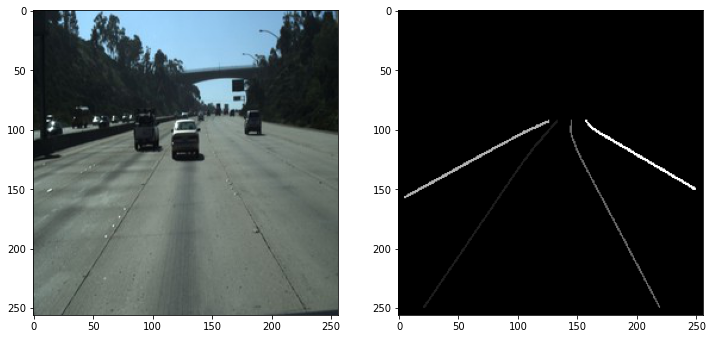

In [157]:
# Visualize random image and label
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(train_images[image_number])
plt.subplot(122)
plt.imshow(train_masks[image_number], cmap='gray')
plt.show()

In [133]:
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

In [163]:
print(train_images.shape)
print(train_masks_input.shape)

(1000, 256, 256, 3)
(1000, 256, 256, 1)


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_images, train_masks_input, test_size = 0.20, random_state = 0)
print("Class values in the dataset are ... ", np.unique(Y_train))

Class values in the dataset are ...  [0 1 2 3 4]


In [165]:
from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(Y_train, num_classes=n_classes)
print(train_masks_cat.shape)
test_masks_cat = to_categorical(Y_test, num_classes=n_classes)
print(test_masks_cat.shape)

(800, 256, 256, 5)
(200, 256, 256, 5)


In [166]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [167]:
print(IMG_HEIGHT)
print(IMG_WIDTH)
print(IMG_CHANNELS)

256
256
3


In [168]:
def unet(n_classes, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):

    #Build the model
    inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(n_classes, (1, 1), activation='softmax')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [169]:
model = unet(n_classes, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 256, 256, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 256, 16  448         ['lambda_2[0][0]']               
                                )                                                                 
                                                                                            

In [170]:
results = model.fit(X_train, train_masks_cat, validation_split=0.2, batch_size=16, epochs=30)

Epoch 1/30
40/40 [==============================] - 6s 105ms/step - loss: 0.2603 - accuracy: 0.9672 - val_loss: 0.1207 - val_accuracy: 0.9824
Epoch 2/30
40/40 [==============================] - 4s 94ms/step - loss: 0.1115 - accuracy: 0.9826 - val_loss: 0.1283 - val_accuracy: 0.9824
Epoch 3/30
40/40 [==============================] - 4s 95ms/step - loss: 0.1037 - accuracy: 0.9826 - val_loss: 0.1337 - val_accuracy: 0.9824
Epoch 4/30
40/40 [==============================] - 4s 95ms/step - loss: 0.0993 - accuracy: 0.9826 - val_loss: 0.1443 - val_accuracy: 0.9824
Epoch 5/30
40/40 [==============================] - 4s 94ms/step - loss: 0.0938 - accuracy: 0.9826 - val_loss: 0.1166 - val_accuracy: 0.9824
Epoch 6/30
40/40 [==============================] - 4s 94ms/step - loss: 0.0892 - accuracy: 0.9826 - val_loss: 0.1016 - val_accuracy: 0.9824
Epoch 7/30
40/40 [==============================] - 4s 94ms/step - loss: 0.0839 - accuracy: 0.9826 - val_loss: 0.0969 - val_accuracy: 0.9824
Epoch 8/30
4

In [171]:
_, acc = model.evaluate(X_test, test_masks_cat)
print("Accuracy is = ", (acc * 100.0), "%")

7/7 [==============================] - 1s 54ms/step - loss: 0.0368 - accuracy: 0.9844
Accuracy is =  98.43948483467102 %


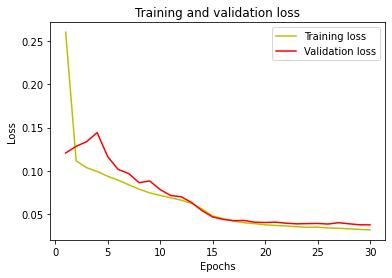

In [172]:
#plot the training and validation accuracy and loss at each epoch
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

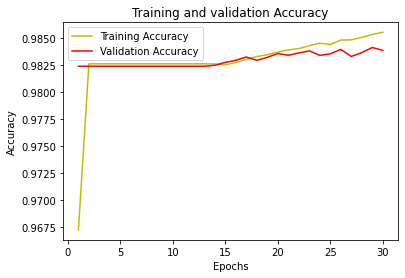

In [173]:
plt.plot(epochs, results.history['accuracy'], 'y', label='Training Accuracy')
plt.plot(epochs, results.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

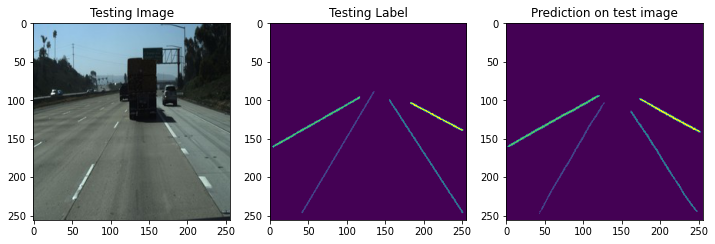

In [342]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
img = test_img.reshape(1,256,256,3)
ground_truth=Y_test[test_img_number]
prediction = (model.predict(img))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

In [309]:
print(predicted_img.shape)

(256, 256)


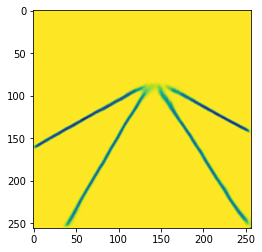

In [356]:
asd = np.squeeze(prediction)
zxc = asd[:,:, 0]
plt.imshow(zxc)
plt.show() 

In [357]:
print(1-zxc)

[[1.1920929e-07 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.4305115e-06 2.0152330e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [3.5762787e-07 0.0000000e+00 0.0000000e+00 ... 2.3535550e-02
  2.2404313e-02 1.0194719e-01]
 [3.6954880e-06 0.0000000e+00 0.0000000e+00 ... 8.5571408e-03
  1.5889168e-02 9.2361450e-02]
 [2.0903349e-04 2.3841858e-07 0.0000000e+00 ... 5.8644295e-02
  6.8288863e-02 3.2317251e-01]]
